<a href="https://colab.research.google.com/github/ssaine95/CoderHouseDataScience/blob/main/Pruebas_Modelos_para_Outliers_y_Regresiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **2. Importación del Dataset**

In [1]:
! pip install chart_studio
! pip install bqplot
! pip install pingouin



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 3.1 MB/s eta 0:00:00


In [2]:
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from   scipy import stats
import numpy as np
import statsmodels.formula.api as sm
import chart_studio.plotly as py
import os

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd '/content/drive/MyDrive/Coderhouse'
df3 = pd.read_excel('footballData2.xlsx')
print(df3)

/content/drive/MyDrive/Coderhouse
       sofifa_id         short_name                            long_name  age  \
0         158023           L. Messi      Lionel AndrÃ©s Messi Cuccittini   33   
1          20801  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   35   
2         200389           J. Oblak                            Jan Oblak   27   
3         188545     R. Lewandowski                   Robert Lewandowski   31   
4         190871          Neymar Jr       Neymar da Silva Santos JÃºnior   28   
...          ...                ...                                  ...  ...   
18714     256679          K. Angulo                         Kevin Angulo   24   
18715     257710     Zhang Mengxuan                       Mengxuan Zhang   21   
18716     250989      Wang Zhenghao                            çŽ‹æ”¿è±ª   20   
18717     257697        Chen Zitong                          Zitong Chen   23   
18718     257936           Song Yue                             Yue Song   

In [5]:
df3.head()

,sofifa_id,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,...,gk_speed,gk_positioning,attacking_finishing,skill_dribbling,movement_acceleration,movement_sprint_speed,power_shot_power,mentality_aggression,defending_standing_tackle,goalkeeping_handling
0,158023,L. Messi,Lionel AndrÃ©s Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,Spain Primera Division,...,0,0,95,96,91,80,86,44,35,11
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,Italian Serie A,...,0,0,95,88,87,91,94,63,32,11
2,200389,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,AtlÃ©tico Madrid,Spain Primera Division,...,52,90,11,12,43,60,59,34,12,92
3,188545,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern MÃ¼nchen,German 1. Bundesliga,...,0,0,94,85,77,78,89,81,42,6
4,190871,Neymar Jr,Neymar da Silva Santos JÃºnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,French Ligue 1,...,0,0,87,95,94,89,80,51,30,9


In [6]:
df3.columns

Index(['sofifa_id', 'short_name', 'long_name', 'age', 'dob', 'height_cm',
       'weight_kg', 'nationality', 'club_name', 'league_name', 'league_rank',
       'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions',
       'player_positions2', 'position_segment', 'position_desc',
       'preferred_foot', 'international_reputation', 'weak_foot',
       'skill_moves', 'work_rate', 'body_type', 'real_face',
       'release_clause_eur', 'team_position', 'team_jersey_number',
       'loaned_from', 'joined', 'contract_valid_until', 'nation_position',
       'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes', 'gk_speed', 'gk_positioning', 'attacking_finishing',
       'skill_dribbling', 'movement_acceleration', 'movement_sprint_speed',
       'power_shot_power', 'mentality_aggression', 'defending_standing_tackle',
       'goalkeeping_handling'],
      dtype='object')

In [7]:
print(df3.dtypes)

sofifa_id                             int64
short_name                           object
long_name                            object
age                                   int64
dob                          datetime64[ns]
height_cm                             int64
weight_kg                             int64
nationality                          object
club_name                            object
league_name                          object
league_rank                           int64
overall                               int64
potential                             int64
value_eur                             int64
wage_eur                              int64
player_positions                     object
player_positions2                    object
position_segment                     object
position_desc                        object
preferred_foot                       object
international_reputation              int64
weak_foot                             int64
skill_moves                     

In [8]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18719 entries, 0 to 18718
Data columns (total 54 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   sofifa_id                  18719 non-null  int64         
 1   short_name                 18719 non-null  object        
 2   long_name                  18719 non-null  object        
 3   age                        18719 non-null  int64         
 4   dob                        18719 non-null  datetime64[ns]
 5   height_cm                  18719 non-null  int64         
 6   weight_kg                  18719 non-null  int64         
 7   nationality                18719 non-null  object        
 8   club_name                  18719 non-null  object        
 9   league_name                18719 non-null  object        
 10  league_rank                18719 non-null  int64         
 11  overall                    18719 non-null  int64         
 12  pote

## Prueba **outliers** con Isolation Forest

In [19]:
df3_reducido = df3[['age',
 'height_cm',
 'overall',
 'potential',
 'value_eur',
 'dribbling',
 'defending',
 'physic',
 'movement_acceleration',
 'mentality_aggression','wage_eur']]

In [10]:
df3_reducido_3 = df3 [['age','height_cm','weight_kg','overall', 'potential', 'value_eur', 'wage_eur','skill_moves','pace', 'shooting', 'passing', 'dribbling','defending', 'physic','attacking_finishing','skill_dribbling', 'movement_acceleration','movement_sprint_speed','power_shot_power', 'mentality_aggression']]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


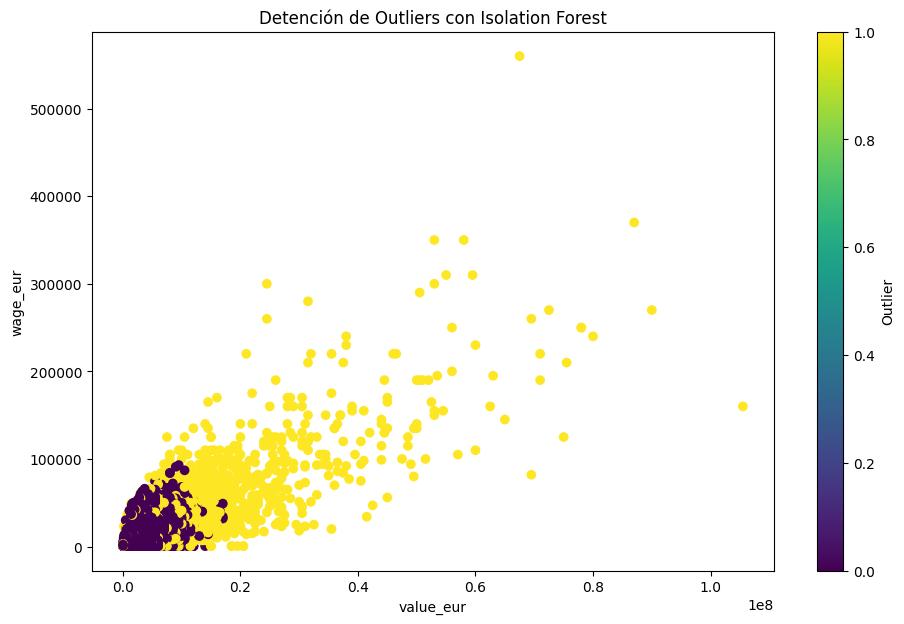

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest


# Entrenar el modelo Isolation Forest
model = IsolationForest(contamination=0.1)  # contamination representa la proporción esperada de valores atípicos
model.fit(df3_reducido)

# Predecir outliers
outliers = model.predict(df3_reducido)
outliers_mask = outliers == -1  # Filtrar los valores que son considerados outliers

# Visualizar los outliers
plt.scatter(df3_reducido['value_eur'], df3_reducido['wage_eur'], c=outliers_mask, cmap='viridis')
plt.xlabel('value_eur')
plt.ylabel('wage_eur')
plt.title('Detención de Outliers con Isolation Forest')
plt.colorbar(label='Outlier')
plt.show()


In [13]:
print(outliers)

[-1 -1 -1 ...  1  1  1]


In [14]:
print(outliers_mask)

[ True  True  True ... False False False]


In [21]:
df_clean = df3_reducido[~outliers_mask]

In [30]:
print(df_clean)

       age  height_cm  overall  potential  value_eur  dribbling  defending  \
346     30        177       81         81   14000000         81         75   
355     30        182       81         81   16500000         82         70   
414     27        179       80         81   16500000         80         70   
415     27        181       80         81   14500000         75         73   
430     33        177       80         80    9000000         85         37   
...    ...        ...      ...        ...        ...        ...        ...   
18706   19        174       47         63      60000         48         44   
18707   19        166       47         62      60000         46         40   
18714   24        176       47         52      40000         47         41   
18717   23        186       47         51      40000         48         44   
18718   28        185       47         47      30000         46         40   

       physic  movement_acceleration  mentality_aggression  wag

In [34]:
model1 = 'value_eur~potential+overall'
lm1   = sm.ols(formula = model1, data = df_clean).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              value_eur   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                 1.174e+04
Date:                Thu, 22 Feb 2024   Prob (F-statistic):               0.00
Time:                        23:51:25   Log-Likelihood:            -2.6265e+05
No. Observations:               16847   AIC:                         5.253e+05
Df Residuals:                   16844   BIC:                         5.253e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.019e+07   1.51e+05   -133.762      0.0

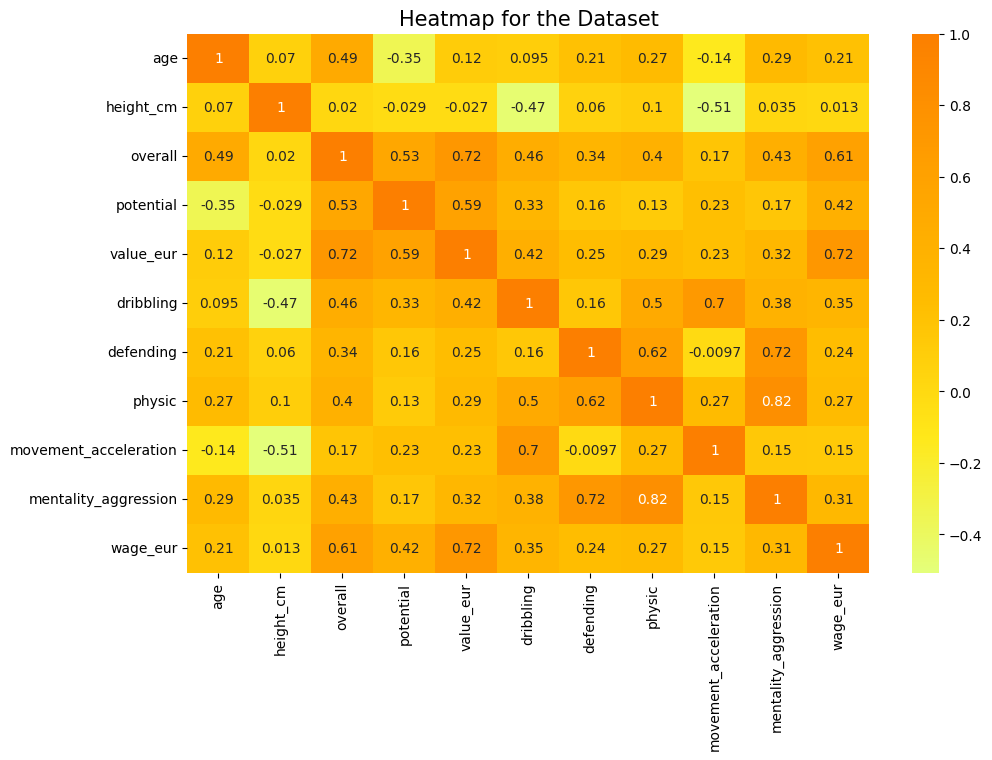

In [29]:
#Hagamos un HeatMap del df
plt.rcParams['figure.figsize'] = (11, 7)

sns.heatmap(df_clean.corr(), annot = True, cmap = 'Wistia')
plt.title('Heatmap for the Dataset', fontsize = 15)
plt.show()

## Prueba **outliers** con DBSCAN

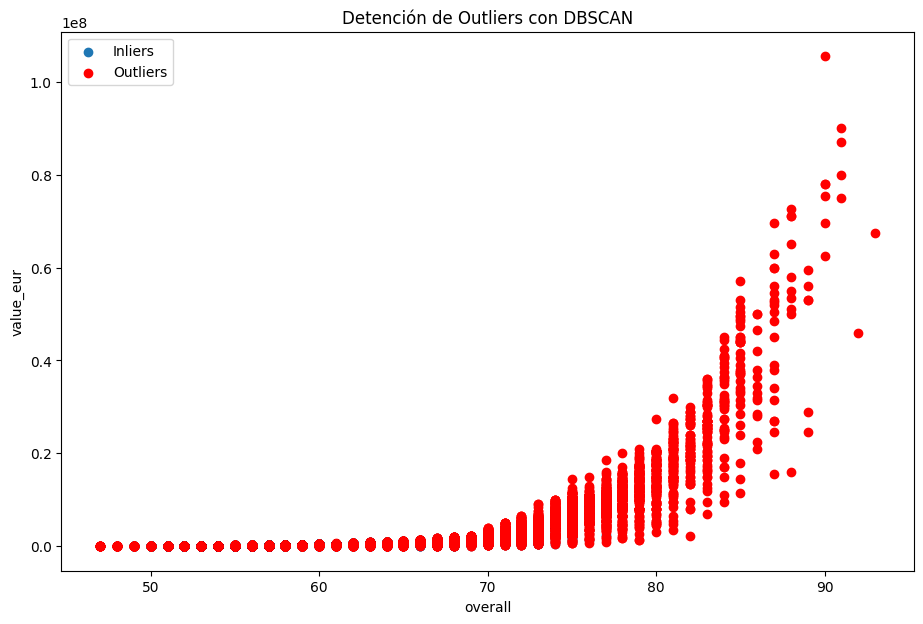

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Escalar los datos para que tengan media cero y desviación estándar uno
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df3_reducido)

# Entrenar el modelo DBSCAN
model = DBSCAN(eps=0.7, min_samples=4)  # eps es la distancia máxima entre dos muestras para ser consideradas vecinas
model.fit(df_scaled)

# Filtrar los outliers
outliers_mask = model.labels_ == -1

# Eliminar los outliers del DataFrame
df_clean_2 = df3_reducido[~outliers_mask]

# Visualizar los resultados
plt.scatter(df_clean_2['overall'], df_clean_2['value_eur'], label='Inliers')
plt.scatter(df3_reducido[outliers_mask]['overall'], df3_reducido[outliers_mask]['value_eur'], color='red', label='Outliers')
plt.xlabel('overall')
plt.ylabel('value_eur')
plt.title('Detención de Outliers con DBSCAN')
plt.legend()
plt.show()

In [57]:
print(df_clean_2)

       age  height_cm  overall  potential  value_eur  dribbling  defending  \
742     26        176       78         80   11000000         76         76   
810     27        180       78         78    9000000         74         77   
829     27        182       78         78    9000000         75         74   
903     24        189       77         83   11000000         55         79   
928     25        177       77         81   10000000         72         73   
...    ...        ...      ...        ...        ...        ...        ...   
18670   19        166       48         64      60000         50         49   
18677   19        177       48         61      50000         46         44   
18678   21        182       48         60      50000         55         44   
18683   21        185       48         59      40000         25         25   
18705   18        179       47         65      60000         46         40   

       physic  movement_acceleration  mentality_aggression  wag

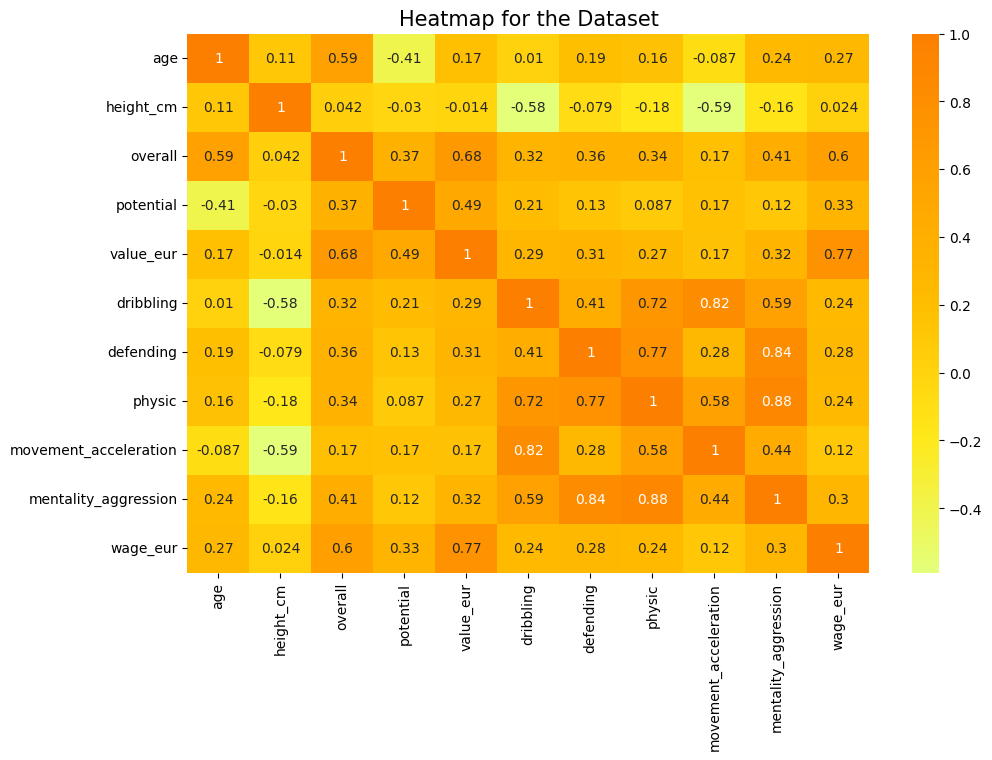

In [49]:
#Hagamos un HeatMap del df
plt.rcParams['figure.figsize'] = (11, 7)

sns.heatmap(df_clean_2.corr(), annot = True, cmap = 'Wistia')
plt.title('Heatmap for the Dataset', fontsize = 15)
plt.show()

In [60]:
model1 = 'value_eur~overall'
lm1   = sm.ols(formula = model1, data = df_clean_2).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              value_eur   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     9033.
Date:                Fri, 23 Feb 2024   Prob (F-statistic):               0.00
Time:                        00:12:24   Log-Likelihood:            -1.5926e+05
No. Observations:               10596   AIC:                         3.185e+05
Df Residuals:                   10594   BIC:                         3.185e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8.066e+06   9.41e+04    -85.734      0.0

## Pruebas regresión con valores Overall y valor de mercado